In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_parquet('fhvhv_tripdata_2021-01.parquet')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11908468 entries, 0 to 11908467
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int64         
 8   DOLocationID          int64         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [25]:
df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02682,B02682,2021-01-01 00:28:09,2021-01-01 00:31:42,2021-01-01 00:33:44,2021-01-01 00:49:07,230,166,5.26,...,1.98,2.75,NaN,0.00,14.99,N,N,,N,N
1,HV0003,B02682,B02682,2021-01-01 00:45:56,2021-01-01 00:55:19,2021-01-01 00:55:19,2021-01-01 01:18:21,152,167,3.65,...,1.63,0.00,NaN,0.00,17.06,N,N,,N,N
2,HV0003,B02764,B02764,2021-01-01 00:21:15,2021-01-01 00:22:41,2021-01-01 00:23:56,2021-01-01 00:38:05,233,142,3.51,...,1.25,2.75,NaN,0.94,12.98,N,N,,N,N
3,HV0003,B02764,B02764,2021-01-01 00:39:12,2021-01-01 00:42:37,2021-01-01 00:42:51,2021-01-01 00:45:50,142,143,0.74,...,0.70,2.75,NaN,0.00,7.41,N,N,,N,N
4,HV0003,B02764,B02764,2021-01-01 00:46:11,2021-01-01 00:47:17,2021-01-01 00:48:14,2021-01-01 01:08:42,143,78,9.20,...,2.41,2.75,NaN,0.00,22.44,N,N,,N,N


In [26]:
df.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [27]:
df['tips'].unique()

array([ 0.  ,  0.94,  2.82, ..., 35.9 , 35.73, 30.47])

In [28]:
diferencias = df['dispatching_base_num'] != df['originating_base_num']
diferencias.unique()

array([False,  True])

In [29]:
df.isnull().sum()

hvfhs_license_num              0
dispatching_base_num           0
originating_base_num     3206079
request_datetime               4
on_scene_datetime        3200015
pickup_datetime                0
dropoff_datetime               0
PULocationID                   0
DOLocationID                   0
trip_miles                     0
trip_time                      0
base_passenger_fare            0
tolls                          0
bcf                            0
sales_tax                      0
congestion_surcharge           0
airport_fee             11902548
tips                           0
driver_pay                     0
shared_request_flag            0
shared_match_flag              0
access_a_ride_flag             0
wav_request_flag               0
wav_match_flag                 0
dtype: int64

In [30]:
df1 = df[['hvfhs_license_num', 'dispatching_base_num', 'pickup_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tips', 'driver_pay']]

In [38]:
df1

,hvfhs_license_num,dispatching_base_num,pickup_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,Uber,B02682,2021-01-01 00:33:44,230,166,5.26,923,22.28,0.00,14.99
1,Uber,B02682,2021-01-01 00:55:19,152,167,3.65,1382,18.36,0.00,17.06
2,Uber,B02764,2021-01-01 00:23:56,233,142,3.51,849,14.05,0.94,12.98
3,Uber,B02764,2021-01-01 00:42:51,142,143,0.74,179,7.91,0.00,7.41
4,Uber,B02764,2021-01-01 00:48:14,143,78,9.20,1228,27.11,0.00,22.44
...,...,...,...,...,...,...,...,...,...,...
11908463,Uber,B02765,2021-01-31 23:25:40,89,71,2.29,870,16.78,0.00,12.06
11908464,Uber,B02872,2021-01-31 23:29:31,182,167,4.10,1093,17.19,2.00,13.66
11908465,Uber,B02872,2021-01-31 23:49:32,167,169,2.40,904,19.53,0.00,15.53
11908466,Uber,B02764,2021-01-31 23:09:29,188,37,3.60,1097,19.87,0.00,17.36


In [32]:
df1 = df1.dropna()

In [33]:
df1.isnull().sum()

hvfhs_license_num       0
dispatching_base_num    0
pickup_datetime         0
PULocationID            0
DOLocationID            0
trip_miles              0
trip_time               0
base_passenger_fare     0
tips                    0
driver_pay              0
dtype: int64

In [34]:
df1.duplicated().sum()

27

In [35]:
df1 = df1.drop_duplicates()

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11908441 entries, 0 to 11908467
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   pickup_datetime       datetime64[us]
 3   PULocationID          int64         
 4   DOLocationID          int64         
 5   trip_miles            float64       
 6   trip_time             int64         
 7   base_passenger_fare   float64       
 8   tips                  float64       
 9   driver_pay            float64       
dtypes: datetime64[us](1), float64(4), int64(3), object(2)
memory usage: 999.4+ MB


In [51]:
df1['hvfhs_company'] = df1['hvfhs_license_num'].replace('HV0002','Juno').replace('HV0003','Uber').replace('HV0004', 'Via').replace('HV0005','Lyft')

In [53]:
df1["date"] = df1["pickup_datetime"].dt.date
df_agrupada1 = df1.groupby(['date', 'hvfhs_company', 'PULocationID', 'DOLocationID']).agg({
    'trip_miles': 'sum',
    'trip_time': 'sum',
    'base_passenger_fare': 'sum',
    'tips': 'sum',
    'driver_pay': 'sum'
}).reset_index()

In [54]:
df_agrupada1

,date,hvfhs_company,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,2021-01-01,Lyft,3,3,11.992,3937,92.57,4.22,71.89
1,2021-01-01,Lyft,3,18,33.721,8440,155.79,2.00,122.68
2,2021-01-01,Lyft,3,20,12.905,3235,56.61,2.00,41.40
3,2021-01-01,Lyft,3,31,1.342,428,10.41,0.00,5.47
4,2021-01-01,Lyft,3,32,21.068,6776,108.32,5.00,89.63
...,...,...,...,...,...,...,...,...,...
1598617,2021-01-31,Via,263,242,9.500,1257,31.89,0.00,21.04
1598618,2021-01-31,Via,263,249,4.870,1438,26.96,0.00,17.11
1598619,2021-01-31,Via,263,256,8.520,1467,32.79,0.00,20.48
1598620,2021-01-31,Via,263,262,1.390,440,12.95,2.59,5.03


In [55]:
df_agrupada1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598622 entries, 0 to 1598621
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   date                 1598622 non-null  object 
 1   hvfhs_company        1598622 non-null  object 
 2   PULocationID         1598622 non-null  int64  
 3   DOLocationID         1598622 non-null  int64  
 4   trip_miles           1598622 non-null  float64
 5   trip_time            1598622 non-null  int64  
 6   base_passenger_fare  1598622 non-null  float64
 7   tips                 1598622 non-null  float64
 8   driver_pay           1598622 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 109.8+ MB


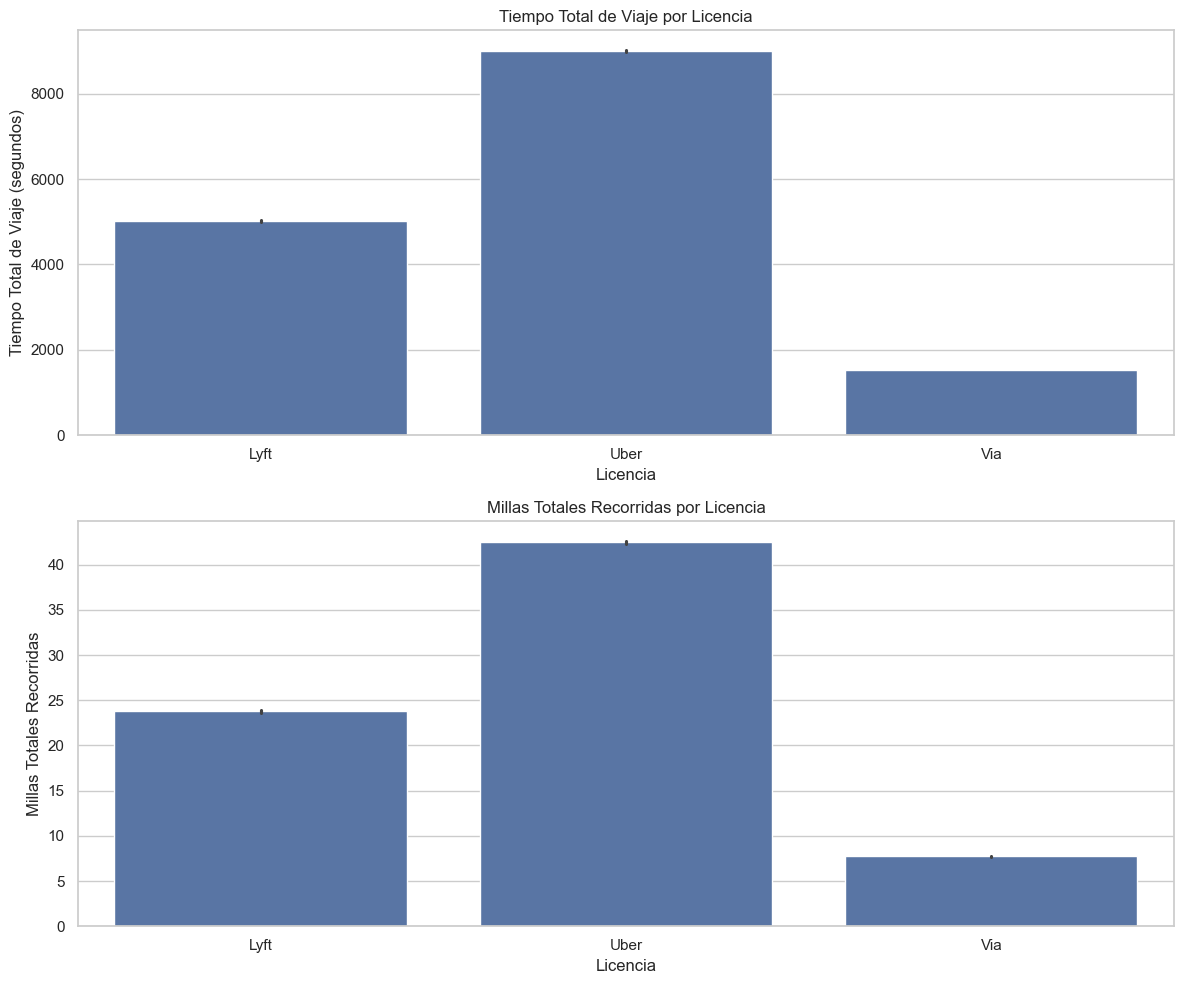

In [58]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con dos subgráficos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Graficar el tiempo de viaje por hvfhs_license_num
sns.barplot(x='hvfhs_company', y='trip_time', data=df_agrupada1, ax=axes[0])
axes[0].set_title('Tiempo Total de Viaje por Licencia')
axes[0].set_xlabel('Licencia')
axes[0].set_ylabel('Tiempo Total de Viaje (segundos)')

# Graficar las millas recorridas por hvfhs_license_num
sns.barplot(x='hvfhs_company', y='trip_miles', data=df_agrupada1, ax=axes[1])
axes[1].set_title('Millas Totales Recorridas por Licencia')
axes[1].set_xlabel('Licencia')
axes[1].set_ylabel('Millas Totales Recorridas')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()